In [8]:
import os
import pySMOKEPostProcessor as pp
import matplotlib.pyplot as plt
import numpy as np

In [11]:
lines.lineStyles.keys()

dict_keys(['-', '--', '-.', ':', 'None', ' ', ''])

In [10]:
lines.lineMarkers.keys()

dict_keys(['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', 'none', ' ', ''])

# Reaction rate Analysis by Reaction Class

combination of formation rates and reaction classification

In [2]:
base_path = os.getcwd()
kin_xml_fld = os.path.join(base_path, 'data', 'Classes', 'kinetics-soot')
class_groups_file = os.path.join(base_path, 'data', 'Classes', 'rxn_class_groups.txt')
plt_fld = os.path.join(base_path, 'Figures')

simul_name = 'example-soot-rate'
simul_fld = os.path.join(base_path, 'data', 'Classes', 'simul', 'Output-soot')

 * Warning: reactiontype GAS-ALL not found in class groups


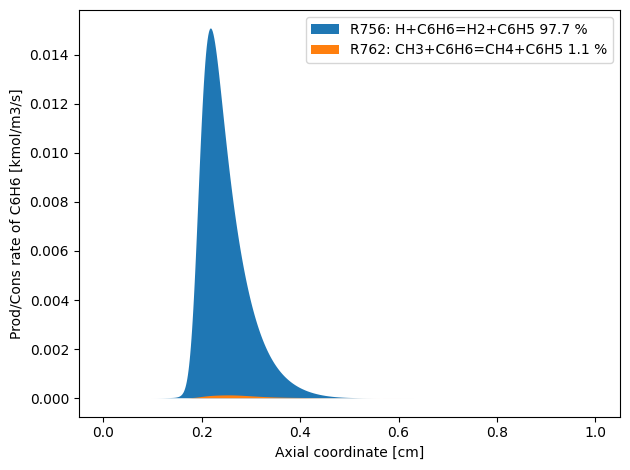

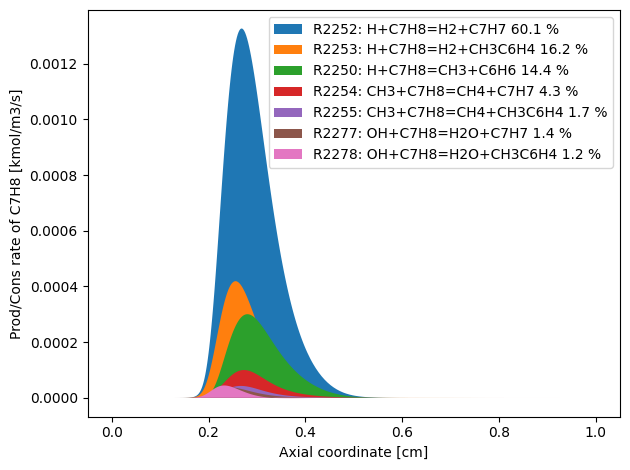

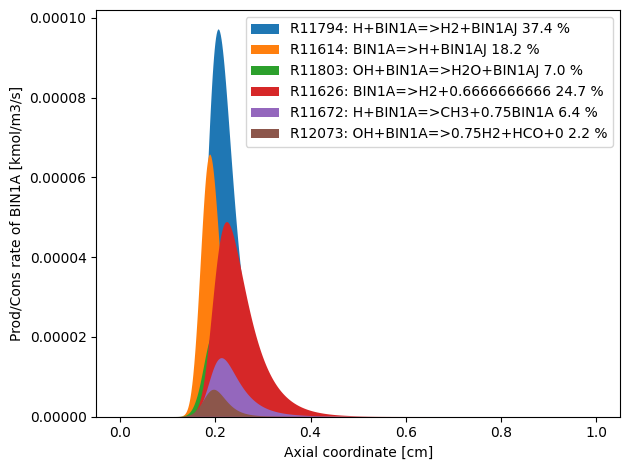

In [15]:
# species and class type
species_list = ['C6H6','C7H8','BIN1A']
sortlist = ['classtype'] # classtype, speciestype, reactiontype, bimoltype (R+R, RSR+RSR, M+M, ETC) sum if both apply and sort by this criteria

# ropa options:
ropa_type = 'global' 	 # alternative: {'local': 0.1}, {'region': [0.01, 0.1]}
rate_type = 'C'          # rate based on carbon production/consumption
x_axis = 'axial-coordinate' # simulation of a flame - along axial coordinate

# assign class
fluxbyclass = pp.FluxByClass(kinetic_mechanism = kin_xml_fld, 
                          classes_definition = class_groups_file, 
                          verbose = False)

# assign cumulative rate
for species_i in species_list:
        x, rr_matrix, name_and_maxflux = fluxbyclass.process_cumulative_reaction_rate(
        simul_fld, x_axis, species_i, rate_type,
        # optional inputs: set to default as example
        filter_ClassesToPlot = [], threshold = 1e-2, n_of_rxns = 40, verbose = False)
        #plot
		
        fig,ax=plt.subplots(nrows=1, ncols=1)
        
        for j in range(len(name_and_maxflux)):
            ax.stackplot(x, rr_matrix[j])	

        ax.legend(name_and_maxflux, fontsize="10")
        ax.set_xlabel('Axial coordinate [cm]')
        ax.set_ylabel('Prod/Cons rate of ' + species_i + ' [kmol/m3/s]')
        plt.tight_layout()
        pp.save_fig(fig, plt_fld, [''], simul_name + '-' + 'rates-' + species_i)



### Reaction rates by class

 * Warning: reactiontype GAS-ALL not found in class groups


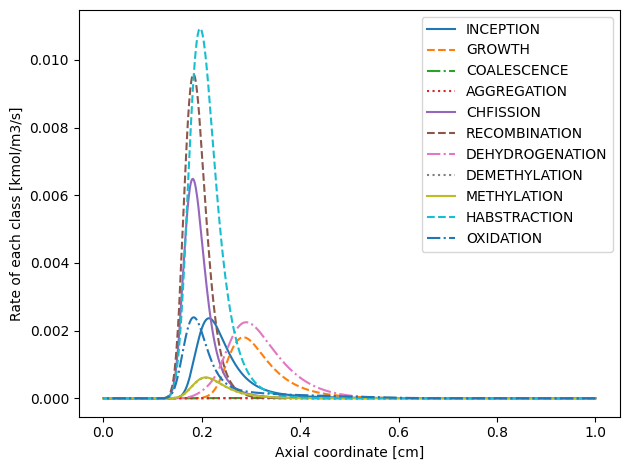

In [16]:
# processes reaction rates by class - rates independent of a specific species
# ropa options:
x_axis = 'axial-coordinate'

# assign class
fluxbyclass = pp.FluxByClass(kinetic_mechanism = kin_xml_fld, 
                          classes_definition = class_groups_file, 
                          verbose = True)

fig, ax = plt.subplots(nrows = 1, ncols = 1) #initialize figure
# assign cumulative rate
filter_ClassesToPlot = ['INCEPTION','GROWTH','COALESCENCE','AGGREGATION','CHFISSION','RECOMBINATION','DEHYDROGENATION','DEMETHYLATION','METHYLATION','HABSTRACTION','OXIDATION']
linestyles = ['-', '--', '-.', ':']*3
for i, class_i in enumerate(filter_ClassesToPlot): 	
    x, rr = fluxbyclass.process_reaction_class_rate(simul_fld, x_axis, class_i)
    
    ax.plot(x, rr, linestyle = linestyles[i])
    
ax.legend(filter_ClassesToPlot, fontsize="10")
ax.set_xlabel('Axial coordinate [cm]')
ax.set_ylabel('Rate of each class [kmol/m3/s]')
plt.tight_layout()
pp.save_fig(fig, plt_fld, sortlist, simul_name + '-rates')
        
